In [1]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import plotly.graph_objects as go

### En este notebook vamos a realizar el preprocesamiento de un dataset de airbnb, en concreto del dataset de la ciudad de Tokyo 'http://insideairbnb.com/tokyo/'. 

### Primero, descargaremos el el dataset de la URL para posteriormente pre-procesar los datos y continuar con el EDA (Exploratory Data Analysis). Finalmente, guardaremos el output del CSV pre-procesado para pasar a analizarlo con Power BI.

### El notebook presenta la siguiente  estructura:

1. Lectura del fichero
2. Preprocesamiento de datos (EDA)
3. Generar CSV preprocesado para Power BI

## 1. Lectura del fichero

In [2]:
#Leemos los ficheros
df_listings = pd.read_csv(os.path.join(os.getcwd(),'listings2.csv'))
df_neighbourhoods = pd.read_csv(os.path.join(os.getcwd(),'neighbourhoods.csv'))
df_reviews = pd.read_csv(os.path.join(os.getcwd(),'reviews2.csv'))


In [3]:
#Mostramos los dataframes para observar su contenido
pd.set_option('display.max_columns', None)

df_listings.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,197677,https://www.airbnb.com/rooms/197677,20231227173752,2023-12-28,city scrape,Rental unit in Sumida · ★4.77 · 1 bedroom · 2 ...,NaN,NaN,https://a0.muscache.com/pictures/38437056/d27f...,964081,https://www.airbnb.com/users/show/964081,Yoshimi & Marek,2011-08-13,"Tokyo, Japan",Would love to travel all over the world and me...,within a day,100%,100%,t,https://a0.muscache.com/im/users/964081/profil...,https://a0.muscache.com/im/users/964081/profil...,Sumida District,1,2,"['email', 'phone']",t,t,NaN,Sumida Ku,NaN,35.71707,139.82608,Entire rental unit,Entire home/apt,2,NaN,1 bath,NaN,2.0,[],"$12,000.00",3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,0,0,0,80,2023-12-28,174,7,0,2011-09-21,2023-11-18,4.77,4.74,4.92,4.84,4.83,4.54,4.79,M130003350,f,1,1,0,0,1.16
1,776070,https://www.airbnb.com/rooms/776070,20231227173752,2023-12-28,city scrape,Home in Kita-ku · ★4.98 · 1 bedroom · 1 bed · ...,NaN,We love Nishinippori because is nearer to Toky...,https://a0.muscache.com/pictures/efd9f039-dbd2...,801494,https://www.airbnb.com/users/show/801494,Kei,2011-07-10,Japan,Love culture/foods/anime and to know about oth...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/ba6d4...,https://a0.muscache.com/im/pictures/user/ba6d4...,Kita District,1,6,"['email', 'phone']",t,t,"Kita-ku, Tokyo, Japan",Kita Ku,NaN,35.73844,139.76917,Private room in home,Private room,1,NaN,1 shared bath,NaN,1.0,[],"$8,541.00",3,14,3.0,3.0,14.0,14.0,3.0,14.0,NaN,t,5,15,16,161,2023-12-28,249,18,1,2012-11-28,2023-11-30,4.98,4.96,4.92,4.98,4.98,4.84,4.91,M130000243,f,1,0,1,0,1.85
2,905944,https://www.airbnb.com/rooms/905944,20231227173752,2023-12-28,city scrape,Rental unit in Shibuya · ★4.78 · 2 bedrooms · ...,NaN,Hatagaya is a great neighborhood located 4 min...,https://a0.muscache.com/pictures/miso/Hosting-...,4847803,https://www.airbnb.com/users/show/4847803,Best Stay In Tokyo!,2013-01-25,"Tokyo, Japan",A host backed up by a team of professional cle...,within an hour,97%,100%,t,https://a0.muscache.com/im/users/4847803/profi...,https://a0.muscache.com/im/users/4847803/profi...,Shibuya District,5,17,"['email', 'phone']",t,t,"Shibuya, Tokyo, Japan",Shibuya Ku,NaN,35.67878,139.67847,Entire rental unit,Entire home/apt,6,NaN,1 bath,NaN,4.0,[],"$27,759.00",3,1125,1.0,5.0,365.0,1125.0,3.7,957.3,NaN,t,0,0,0,0,2023-12-28,198,13,1,2013-04-07,2023-12-10,4.78,4.79,4.77,4.88,4.91,4.78,4.78,Hotels and Inns Business Act | 渋谷区保健所長 | 31渋健生...,t,5,5,0,0,1.52
3,1016831,https://www.airbnb.com/rooms/1016831,20231227173752,2023-12-28,previous scrape,Home in Setagaya · ★4.95 · 1 bedroom · 2 beds ...,NaN,The location is walkable distance to famous Sh...,https://a0.muscache.com/

In [4]:
df_neighbourhoods.head(5)

,neighbourhood_group,neighbourhood
0,NaN,Adachi Ku
1,NaN,Akiruno Shi
2,NaN,Akishima Shi
3,NaN,Aogashima Mura
4,NaN,Arakawa Ku


In [5]:
df_reviews.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,197677,554285,2011-09-21,1002142,Pablo,Couldn’t get any better!\r<br/>\r<br/>The apar...
1,197677,627651,2011-10-14,1031940,Ana & Ricardo,The apartment is bigger than it looks in the p...
2,197677,733040,2011-11-21,1097040,Samuel,The appartement is perfect for a couple! It is...
3,197677,755841,2011-11-30,1183674,Lisa,We had a terrific stay at Yoshimi and Marek's ...
4,197677,852938,2012-01-09,1538004,Langan,We loved our stay at the Oshiage Holiday Apart...


### Vista la información, me parece que el único fichero con información relevante es el de listings por lo que centraremos el análisis en ese fichero

## 2. Preprocesamiento de los datos

### Exploratory Data Analysis (EDA)

In [6]:
#Mostramos la estructura del Dataframe. Podemos observar que tiene 13725 filas y 75 columnas
df_listings.shape

(13725, 75)

In [7]:
#Mostramos la información del DataFrame
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13725 entries, 0 to 13724
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            13725 non-null  int64  
 1   listing_url                                   13725 non-null  object 
 2   scrape_id                                     13725 non-null  int64  
 3   last_scraped                                  13725 non-null  object 
 4   source                                        13725 non-null  object 
 5   name                                          13725 non-null  object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         9072 non-null   object 
 8   picture_url                                   13725 non-null  object 
 9   host_id                                       13725 non-null 

Primero, vamos a seleccionar qué columnas del dataframe nos vamos a quedar para realizar nuestro análisis y dropearemos el resto.

In [8]:
#Nos quedaremos con las columnas que nos interesan y dropamos el resto. id, name, host_id, host_name, neighbourhood_cleansed, latitude, longitude,  property_type, room_type, accommodates, beds, price, minimun_nights, number_of_reviews, review_score_rating, reviews_per_month
df = df_listings[['id', 'name', 'host_id', 'host_name', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'beds', 'price', 'minimum_nights', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month']]
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13725 entries, 0 to 13724
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      13725 non-null  int64  
 1   name                    13725 non-null  object 
 2   host_id                 13725 non-null  int64  
 3   host_name               13725 non-null  object 
 4   neighbourhood_cleansed  13725 non-null  object 
 5   latitude                13725 non-null  float64
 6   longitude               13725 non-null  float64
 7   property_type           13725 non-null  object 
 8   room_type               13725 non-null  object 
 9   accommodates            13725 non-null  int64  
 10  beds                    13067 non-null  float64
 11  price                   13312 non-null  object 
 12  minimum_nights          13725 non-null  int64  
 13  number_of_reviews       13725 non-null  int64  
 14  review_scores_rating    12092 non-null

,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,beds,price,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month
0,197677,Rental unit in Sumida · ★4.77 · 1 bedroom · 2 ...,964081,Yoshimi & Marek,Sumida Ku,35.71707,139.82608,Entire rental unit,Entire home/apt,2,2.0,"$12,000.00",3,174,4.77,1.16
1,776070,Home in Kita-ku · ★4.98 · 1 bedroom · 1 bed · ...,801494,Kei,Kita Ku,35.73844,139.76917,Private room in home,Private room,1,1.0,"$8,541.00",3,249,4.98,1.85
2,905944,Rental unit in Shibuya · ★4.78 · 2 bedrooms · ...,4847803,Best Stay In Tokyo!,Shibuya Ku,35.67878,139.67847,Entire rental unit,Entire home/apt,6,4.0,"$27,759.00",3,198,4.78,1.52
3,1016831,Home in Setagaya · ★4.95 · 1 bedroom · 2 beds ...,5596383,Wakana,Setagaya Ku,35.65800,139.67134,Private room in home,Private room,2,2.0,NaN,30,260,4.95,1.99
4,3838856,Home in Shinjuku · ★4.89 · 3 bedrooms · 5 beds...,4626879,Tracey,Shibuya Ku,35.68245,139.69009,Entire home,Entire home/apt,7,5.0,"$26,775.00",1,220,4.89,1.95


A continuación, vamos a dar el formato dtype adecuado a cada columna para poder operar correctamente con ellas

In [9]:
# Vemos que price es un string y debería ser un float.
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13725 entries, 0 to 13724
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      13725 non-null  int64  
 1   name                    13725 non-null  object 
 2   host_id                 13725 non-null  int64  
 3   host_name               13725 non-null  object 
 4   neighbourhood_cleansed  13725 non-null  object 
 5   latitude                13725 non-null  float64
 6   longitude               13725 non-null  float64
 7   property_type           13725 non-null  object 
 8   room_type               13725 non-null  object 
 9   accommodates            13725 non-null  int64  
 10  beds                    13067 non-null  float64
 11  price                   13312 non-null  float64
 12  minimum_nights          13725 non-null  int64  
 13  number_of_reviews       13725 non-null  int64  
 14  review_scores_rating    12092 non-null

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11224\3933430774.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_11224\3933430774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)


Una vez tenemos nuestro nuevo dataframe, lidiaremos con los valores nulos

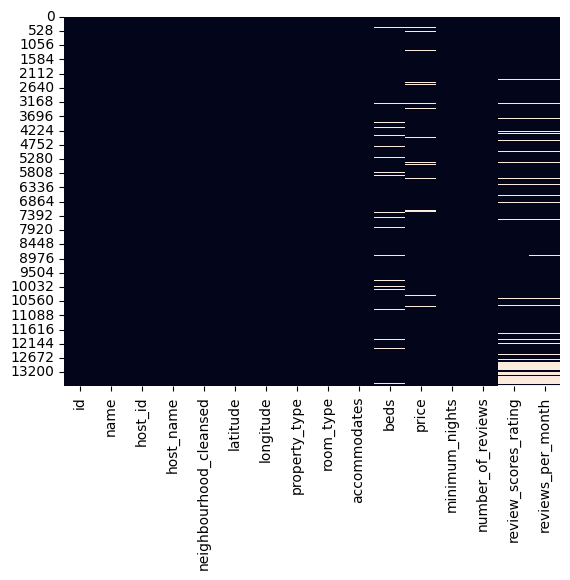

id                           0
name                         0
host_id                      0
host_name                    0
neighbourhood_cleansed       0
latitude                     0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
beds                       658
price                      413
minimum_nights               0
number_of_reviews            0
review_scores_rating      1633
reviews_per_month         1639
dtype: int64


In [10]:
#Comprobamos cuántos valores nulos hay en cada columna con un heatmap
plot = sns.heatmap(df.isnull(), cbar=False)
plt.show()
print(df.isnull().sum())


Podemos observar lo siguiente:
- La columna bed presenta 658 registros nulos, por lo que al ser una variable que está directamente relacionada con el accommodates, utilizaremos el algoritmo KNN para rellenar dichos valores.
- La columna price presenta 413 registros nulos. Para resolver la incidencia, tenemos que ver si los datos siguen una distribución normal. En tal caso, sustituiremos estos valores con la media de los precios de los apartamentos que se encuentre ubicados en la misma zona que éstos. De lo contrario, lo sustituiremos por la mediana.
- Las columnas review_scores_rating y reviews_per_month presentan 1633 y 1639  valores nulos respectivamente. Igual que con el precio, valoraremos usar la media o la mediana para completar los datos faltantes.

El siguiente paso, es comprobar la distribución de nuestros datos (en este caso, de la columna del precio) así como de los posibles outliers que puedan existir.

In [11]:
#Vamos a identificar si los valores de la columna price presentan una distribución normal y sus outliers
fig = px.box(df,y='price')
fig.show()

In [12]:
#arreglamos los outliers de la columna'price' con el método de los percentiles. Creamos una función para ello

def fix_price_outliers(df):
    
    # Hacemos una copia del DataFrame para evitar modificar el original
    df_cleaned = df.copy()

    # Calculamos los percentiles 25 y 75 (Q1 y Q3)
    Q1 = df_cleaned['price'].quantile(0.25)
    Q3 = df_cleaned['price'].quantile(0.75)

    # Calculamos el rango intercuartílico (IQR)
    IQR = Q3 - Q1

    # Calculamos los límites del intervalo
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Reemplazamos los valores atípicos por los límites del intervalo
    df_cleaned['price'] = df_cleaned['price'].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))
    
    return df_cleaned

In [13]:
#Ejecutamos fix_price_outliers y mostramos el boxplot
df_cleaned = fix_price_outliers(df)
df = df_cleaned
fig = px.box(df,y='price')
fig.show()

Vamos a observar la correlación de nuestras variables

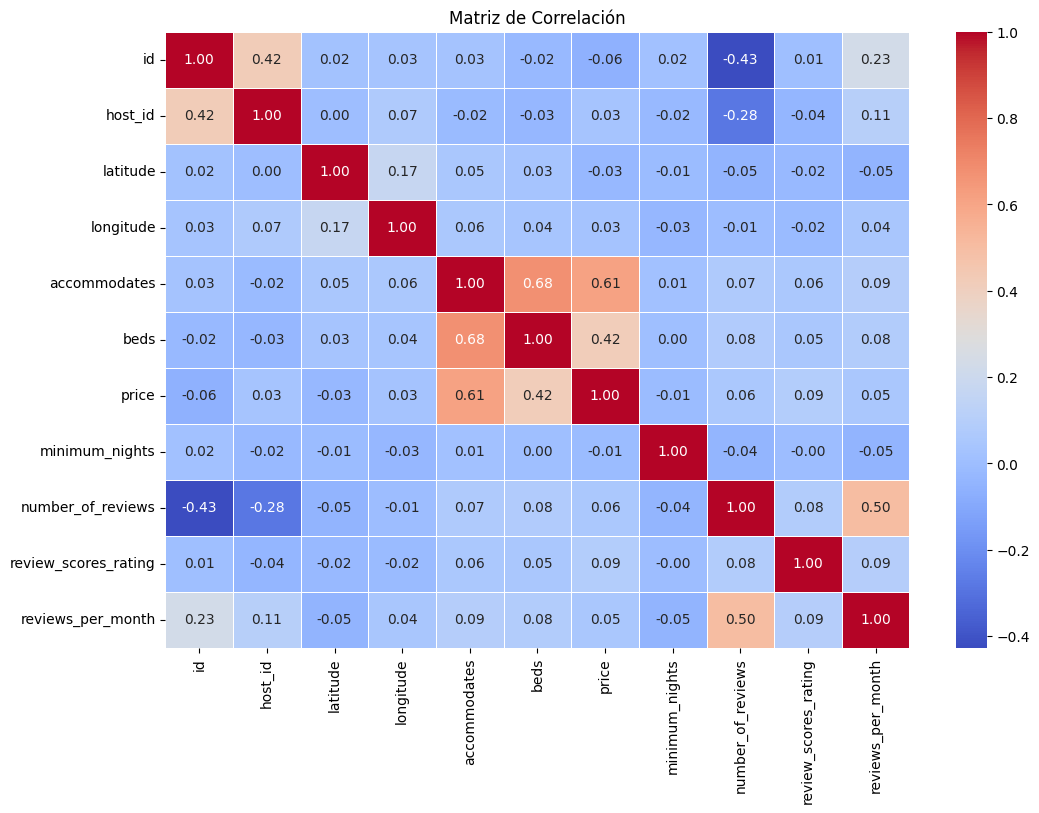

In [14]:
# Seleccionamos solo las variables continuas
continuous_vars = df.select_dtypes(include=['float64', 'int64'])

# Calculamos la matriz de correlación
correlation_matrix = continuous_vars.corr()

# Creamos el heatmap con las correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Podemos observar que:
- beds tiene una correlación positiva moderada con accommodates (sabemos que habitualmente por cada cama entran dos personas por lo que la correlación no puede ser perfecta) y price ya que a mayor número de gente que puede albergar el apartamento, mayor número de camas y mayor precio.
- no existe ninguna otra correlación significativa en el dataset.

Ahora vamos a corregir los valores faltantes de nuestros datos

In [15]:
#Empezamos por la columna beds. Como habíamos mencionado, usaremos tilizaremos el algoritmo KNN para rellenar dichos valores en función de la columna accommodates y price
from sklearn.impute import KNNImputer

# Seleccionamos las columnas que usaremos para imputar los valores faltantes
features_for_imputation = df[['beds','accommodates', 'price']]  

# Instanciamos el imputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")

# Ejecutamos el imputer
df_imputed = imputer.fit_transform(features_for_imputation)

# El output es un array de numpy, lo convertimos a DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=features_for_imputation.columns)

# Reemplazamos los valores imputados en el DataFrame original
df['beds'] = df_imputed['beds']




Volvemos a la info del dataframe para comprobar que ya no tenemos valores nulos

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13725 entries, 0 to 13724
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      13725 non-null  int64  
 1   name                    13725 non-null  object 
 2   host_id                 13725 non-null  int64  
 3   host_name               13725 non-null  object 
 4   neighbourhood_cleansed  13725 non-null  object 
 5   latitude                13725 non-null  float64
 6   longitude               13725 non-null  float64
 7   property_type           13725 non-null  object 
 8   room_type               13725 non-null  object 
 9   accommodates            13725 non-null  int64  
 10  beds                    13725 non-null  float64
 11  price                   13312 non-null  float64
 12  minimum_nights          13725 non-null  int64  
 13  number_of_reviews       13725 non-null  int64  
 14  review_scores_rating    12092 non-null

Convertimos la columna bed a tipo int64 ya que el número de camas no debería adoptar un valor decimal.

In [17]:
#Convertimos la columna bed a tipo int64 ya que el número de camas no debería adoptar un valor decimal. Redondeamos el valor.
df['beds'] = df['beds'].round().astype(int)

Continuamos con la columna price. Usaremos la mediana (teniendo en cuenta a que neighbourhood pertenencen) para rellenar los valores faltantes ya que hemos visto que existian outliers

In [18]:
#Continuamos con la columna price. Usaremos la mediana (teniendo en cuenta a que neighbourhood pertenencen) para rellenar los valores faltantes ya que hemos visto que existian outliers
df['price'] = df['price'].fillna(df.groupby('neighbourhood_cleansed')['price'].transform('median'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13725 entries, 0 to 13724
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      13725 non-null  int64  
 1   name                    13725 non-null  object 
 2   host_id                 13725 non-null  int64  
 3   host_name               13725 non-null  object 
 4   neighbourhood_cleansed  13725 non-null  object 
 5   latitude                13725 non-null  float64
 6   longitude               13725 non-null  float64
 7   property_type           13725 non-null  object 
 8   room_type               13725 non-null  object 
 9   accommodates            13725 non-null  int64  
 10  beds                    13725 non-null  int32  
 11  price                   13725 non-null  float64
 12  minimum_nights          13725 non-null  int64  
 13  number_of_reviews       13725 non-null  int64  
 14  review_scores_rating    12092 non-null

Continuamos con las columnas review_scores_rating y reviews_per_month. Usaremos la mediana (teniendo en cuenta a que neighbourhood pertenencen) para rellenar los valores faltantes

In [19]:
#Continuamos con las columnas review_scores_rating y reviews_per_month. Usaremos la mediana (teniendo en cuenta a que neighbourhood pertenencen) para rellenar los valores faltantes
df['review_scores_rating'] = df['review_scores_rating'].fillna(df.groupby('neighbourhood_cleansed')['review_scores_rating'].transform('median'))
df['reviews_per_month'] = df['reviews_per_month'].fillna(df.groupby('neighbourhood_cleansed')['reviews_per_month'].transform('median'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13725 entries, 0 to 13724
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      13725 non-null  int64  
 1   name                    13725 non-null  object 
 2   host_id                 13725 non-null  int64  
 3   host_name               13725 non-null  object 
 4   neighbourhood_cleansed  13725 non-null  object 
 5   latitude                13725 non-null  float64
 6   longitude               13725 non-null  float64
 7   property_type           13725 non-null  object 
 8   room_type               13725 non-null  object 
 9   accommodates            13725 non-null  int64  
 10  beds                    13725 non-null  int32  
 11  price                   13725 non-null  float64
 12  minimum_nights          13725 non-null  int64  
 13  number_of_reviews       13725 non-null  int64  
 14  review_scores_rating    13724 non-null

In [20]:
# Vemos que sigue faltando un valor por corregir dentro de la columna review_scores_rating y reviews_per_month

# Buscamos las filas con valores faltantes
missing_rows = df[df['review_scores_rating'].isnull()]
missing_rows


,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,beds,price,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month
12804,1022228973561159754,"Home in Hinohara, Nishitama District, Tokyo · ...",545977859,安武,Hinohara Mura,35.749423,139.081322,Entire home,Entire home/apt,5,2,68375.375,1,0,NaN,NaN


In [21]:
#Observamos que el valor faltante se debe a que viene informado como NaN en el dataset original. En este caso, vamos a dropear esa fila para que no nos afecte en futuros análisis
df = df.drop(12804)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13724 entries, 0 to 13724
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      13724 non-null  int64  
 1   name                    13724 non-null  object 
 2   host_id                 13724 non-null  int64  
 3   host_name               13724 non-null  object 
 4   neighbourhood_cleansed  13724 non-null  object 
 5   latitude                13724 non-null  float64
 6   longitude               13724 non-null  float64
 7   property_type           13724 non-null  object 
 8   room_type               13724 non-null  object 
 9   accommodates            13724 non-null  int64  
 10  beds                    13724 non-null  int32  
 11  price                   13724 non-null  float64
 12  minimum_nights          13724 non-null  int64  
 13  number_of_reviews       13724 non-null  int64  
 14  review_scores_rating    13724 non-null

## 3. Generar CSV preprocesado para Power BI

Ahora sí, tenemos nuestro database pre-procesado y podemos guardarlo como un csv nuevo con el cual continuaremos nuestro análisis desde PowerBI.

In [22]:
#Generamos un fichero csv nuevo con los datos pre-procesados
df.to_csv('Airbnb_Tokyo_preprocesado.csv', index=False)